In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from diagnostics.inventory import ModelInventoryBuilder, QueryBuilder

In [55]:
# load a parquet file for mirror mouse
sns.set_style('white')
dataset_name = "mirror-mouse"
filename = "mirror-mouse_video_preds.pqt"

df_save_path = "/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/litpose_results/mirror-mouse/23-01_ptl/mirror-mouse_video_preds.pqt"
df_save_path_dlc = "/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/litpose_results/mirror-mouse/22-12_dlc/mirror-mouse_video_preds_dlc.pqt"
assert os.path.exists(df_save_path), f"File {df_save_path} does not exist"


In [56]:
df_video_preds = pd.read_parquet(df_save_path) # load the parquet file
df_video_preds_dlc = pd.read_parquet(df_save_path_dlc) # load the parquet file

In [76]:
df_video_preds.head()

bodyparts paw1LH_top                         paw2LF_top              \
coords             x           y likelihood           x           y   
0          50.480515  123.885651   0.999732  290.451141  101.216125   
1          50.480515  123.885651   0.999732  290.451141  101.216125   
2          50.480515  123.885651   0.999732  290.451141  101.216125   
3          48.359268  124.993523   0.999068  286.675964   99.951584   
4          45.890339  126.397385   0.999974  285.511505   99.690117   

bodyparts             paw3RF_top                        paw4RH_top  ...  \
coords    likelihood           x          y likelihood           x  ...   
0           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
1           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
2           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
3           0.998523  214.889603  99.367928   0.999926  199.066422  ...   
4           0.999808  211.948364  98.404236   0.999585  197.536942  ...   

bodyparts obsHigh_bot             obsLow_bot                         \
coords              y likelihood           x           y likelihood   
0           62.536953   0.000044  388.939697  395.356445   0.999741   
1           62.536953   0.000044  388.939697  395.356445   0.999741   
2           62.536953   0.000044  388.939697  395.356445   0.999741   
3           77.669098   0.000061  388.876190  395.148682   0.999787   
4           73.861153   0.000060  388.868164  395.245758   0.999582   

bodyparts         video_name  \
coords                         
0          180623_000_0_2000   
1          180623_000_0_2000   
2          180623_000_0_2000   
3          180623_000_0_2000   
4          180623_000_0_2000   

bodyparts                                         model_path rng_seed_data_pt  \
coords                                                                          
0          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
1          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
2          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
3          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
4          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   

bodyparts train_frames          model_type  
coords                                      
0                    1  semi-super context  
1                    1  semi-super context  
2                    1  semi-super context  
3                    1  semi-super context  
4                    1  semi-super context  

[5 rows x 56 columns]

In [84]:
df_video_preds.shape[0] / 4

400000.0

In [58]:
df_video_preds_dlc.head()

bodyparts  paw1LH_top                         paw2LF_top             \
coords              x           y likelihood           x          y   
0          142.580658  105.162537   0.999999  274.355042  93.195351   
1          139.945862  105.683281   1.000000  276.774841  92.778320   
2          137.254700  106.180710   1.000000  279.204620  91.648178   
3          136.213867  106.576660   0.999999  281.925659  92.379768   
4          133.926666  107.473267   0.999999  283.088867  92.354614   

bodyparts             paw3RF_top                       paw4RH_top  ...  \
coords    likelihood           x          y likelihood          x  ...   
0           1.000000  243.364212  98.287308   0.999996  46.653481  ...   
1           0.999999  240.719116  97.185242   0.999995  50.918484  ...   
2           0.999999  237.641251  96.983742   0.999996  57.931957  ...   
3           0.999997  235.334625  96.672699   0.999993  64.568298  ...   
4           0.999997  233.235519  96.610504   0.999984  75.617439  ...   

bodyparts obsHigh_bot            obsLow_bot                         \
coords              y likelihood          x           y likelihood   
0          210.407730   0.000905  66.667801  381.683411   0.000223   
1          196.140472   0.001202  66.978546  368.951996   0.000760   
2          219.995316   0.001165  66.662338  367.829712   0.001032   
3          219.871948   0.001126  82.583694  368.656433   0.000477   
4          219.639313   0.001640   2.765776  221.392227   0.000326   

bodyparts         video_name  \
coords                         
0          180609_004_0_2000   
1          180609_004_0_2000   
2          180609_004_0_2000   
3          180609_004_0_2000   
4          180609_004_0_2000   

bodyparts                                         model_path rng_seed_data_pt  \
coords                                                                          
0          /media/mattw/behavior/pose-estimation-data-dlc...                0   
1          /media/mattw/behavior/pose-estimation-data-dlc...                0   
2          /media/mattw/behavior/pose-estimation-data-dlc...                0   
3          /media/mattw/behavior/pose-estimation-data-dlc...                0   
4          /media/mattw/behavior/pose-estimation-data-dlc...                0   

bodyparts train_frames model_type  
coords                             
0                    1        dlc  
1                    1        dlc  
2                    1        dlc  
3                    1        dlc  
4                    1        dlc  

[5 rows x 56 columns]

In [81]:
df_video_preds_dlc.shape

(400000, 56)

In [59]:
df_video_preds_concat = pd.concat([df_video_preds, df_video_preds_dlc], axis=0)

In [60]:
paw_names = ["paw1LH", "paw2LF", "paw3RF", "paw4RH"]
views = ["top", "bot"]
# loop over paw names, and compute the difference in x coordinate between top and bottom views (absolute value)
for paw_name in paw_names:
    df_video_preds_concat[f"{paw_name}_x_diff"] = df_video_preds_concat[(f"{paw_name}_top","x")] - df_video_preds_concat[(f"{paw_name}_bot","x")]  # add a small number to avoid log of zero later on

In [61]:
df_video_preds_concat.head()

bodyparts paw1LH_top                         paw2LF_top              \
coords             x           y likelihood           x           y   
0          50.480515  123.885651   0.999732  290.451141  101.216125   
1          50.480515  123.885651   0.999732  290.451141  101.216125   
2          50.480515  123.885651   0.999732  290.451141  101.216125   
3          48.359268  124.993523   0.999068  286.675964   99.951584   
4          45.890339  126.397385   0.999974  285.511505   99.690117   

bodyparts             paw3RF_top                        paw4RH_top  ...  \
coords    likelihood           x          y likelihood           x  ...   
0           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
1           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
2           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
3           0.998523  214.889603  99.367928   0.999926  199.066422  ...   
4           0.999808  211.948364  98.404236   0.999585  197.536942  ...   

bodyparts obsLow_bot         video_name  \
coords    likelihood                      
0           0.999741  180623_000_0_2000   
1           0.999741  180623_000_0_2000   
2           0.999741  180623_000_0_2000   
3           0.999787  180623_000_0_2000   
4           0.999582  180623_000_0_2000   

bodyparts                                         model_path rng_seed_data_pt  \
coords                                                                          
0          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
1          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
2          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
3          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
4          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   

bodyparts train_frames          model_type paw1LH_x_diff paw2LF_x_diff  \
coords                                                                   
0                    1  semi-super context     -8.340302      8.044373   
1                    1  semi-super context     -8.340302      8.044373   
2                    1  semi-super context     -8.340302      8.044373   
3                    1  semi-super context     -6.621727      6.847778   
4                    1  semi-super context     -6.908966      7.646210   

bodyparts paw3RF_x_diff paw4RH_x_diff  
coords                                 
0              5.765167     -2.026566  
1              5.765167     -2.026566  
2              5.765167     -2.026566  
3              3.710526     -0.558273  
4              3.773743      1.197449  

[5 rows x 60 columns]

In [62]:
# # plot the histogram for supervised model and semi-super context model
# range_val = [-30, 30]
# train_frames = "1"
# rng = "0"
# plt.hist(df_video_preds[(df_video_preds.model_type == "baseline") & (df_video_preds.rng_seed_data_pt == rng) & (df_video_preds.train_frames == train_frames)]["paw1LH_x_diff"], bins=100, range=range_val, alpha=0.3, label="supervised");
# plt.hist(df_video_preds[(df_video_preds.model_type == "semi-super context") & (df_video_preds.rng_seed_data_pt == rng) & (df_video_preds.train_frames == train_frames)]["paw1LH_x_diff"], bins=100, range=range_val, alpha=0.3, label="context+ss");
# #plt.hist(df_video_preds[df_video_preds.model_type == "semi-super context"].paw1LH_x_diff, bins=50, range=[-range_val, range_val], alpha=0.5, label="context");
# plt.legend();
# plt.title("paw1LH top(x)-bottom(x) \n train_frames = %s, rng_seed = %s" % (train_frames, rng));

In [63]:
# sns.histplot(data = df_video_preds[df_video_preds["train_frames"] == "75"], x = "paw1LH_x_diff", hue = "model_type", bins = 50, element="step", multiple = "layer", stat = "density", common_norm = False, alpha = 0.25);

In [64]:
# load the labeled data file for mirror mouse and compute the difference in x coordinate between top and bottom views there too
labels_file = "/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/litpose-datastores-dec-22/mirror-mouse/CollectedData.csv"
assert os.path.exists(labels_file), f"File {labels_file} does not exist"

In [65]:
# load the labels file into a dataframe
df_labels = pd.read_csv(labels_file, index_col=0, header=[1,2])
df_labels.head()

bodyparts                             paw1LH_top         paw2LF_top  \
coords                                         x       y          x   
labeled-data/180605_000/img023761.png      77.25   36.25     253.50   
labeled-data/180605_000/img025996.png      37.25  110.75     285.75   
labeled-data/180605_000/img037515.png     123.25  110.25     325.25   
labeled-data/180605_000/img042413.png     125.25  106.75     230.25   
labeled-data/180605_000/img048598.png      67.75   98.25     269.75   

bodyparts                                         paw3RF_top          \
coords                                          y          x       y   
labeled-data/180605_000/img023761.png  101.900393     198.75   97.75   
labeled-data/180605_000/img025996.png  104.750000     253.25  101.75   
labeled-data/180605_000/img037515.png  114.750000     279.25  103.25   
labeled-data/180605_000/img042413.png   51.250000     317.75  113.25   
labeled-data/180605_000/img048598.png  103.250000     305.75   96.25   

bodyparts                             paw4RH_top         tailBase_top         \
coords                                         x       y            x      y   
labeled-data/180605_000/img023761.png     182.25   63.75          NaN    NaN   
labeled-data/180605_000/img025996.png      46.75  129.75        49.25   8.25   
labeled-data/180605_000/img037515.png      39.75  143.75          NaN    NaN   
labeled-data/180605_000/img042413.png      70.25  123.25        55.75  15.25   
labeled-data/180605_000/img048598.png      29.25   72.75        65.25   7.75   

bodyparts                              ... tailBase_bot         tailMid_bot  \
coords                                 ...            x       y           x   
labeled-data/180605_000/img023761.png  ...        84.75  329.75       46.25   
labeled-data/180605_000/img025996.png  ...        54.25  304.75       27.25   
labeled-data/180605_000/img037515.png  ...        74.75  318.25       34.75   
labeled-data/180605_000/img042413.png  ...        77.25  309.75       32.75   
labeled-data/180605_000/img048598.png  ...        82.75  323.25       35.75   

bodyparts                                     nose_bot         obsHigh_bot  \
coords                                      y        x       y           x   
labeled-data/180605_000/img023761.png  332.75   381.25  281.75       74.25   
labeled-data/180605_000/img025996.png  313.75   382.25  282.25      121.25   
labeled-data/180605_000/img037515.png  389.75   383.25  280.75      236.25   
labeled-data/180605_000/img042413.png  317.75   383.25  280.25      222.25   
labeled-data/180605_000/img048598.png  339.25   381.75  280.25      116.25   

bodyparts                                     obsLow_bot          
coords                                      y          x       y  
labeled-data/180605_000/img023761.png  184.25      74.75  386.25  
labeled-data/180605_000/img025996.png  184.75     118.75  385.75  
labeled-data/180605_000/img037515.png  198.25     234.75  381.75  
labeled-data/180605_000/img042413.png  198.75     213.75  380.25  
labeled-data/180605_000/img048598.png  192.25     112.25  381.25  

[5 rows x 34 columns]

In [66]:
# loop over paw names, and compute the difference in x coordinate between top and bottom views
for paw_name in paw_names:
    df_labels[f"{paw_name}_x_diff"] = df_labels[(f"{paw_name}_top","x")] - df_labels[(f"{paw_name}_bot","x")] # add a small number to avoid log of zero later on

In [67]:
df_labels.head()

bodyparts                             paw1LH_top         paw2LF_top  \
coords                                         x       y          x   
labeled-data/180605_000/img023761.png      77.25   36.25     253.50   
labeled-data/180605_000/img025996.png      37.25  110.75     285.75   
labeled-data/180605_000/img037515.png     123.25  110.25     325.25   
labeled-data/180605_000/img042413.png     125.25  106.75     230.25   
labeled-data/180605_000/img048598.png      67.75   98.25     269.75   

bodyparts                                         paw3RF_top          \
coords                                          y          x       y   
labeled-data/180605_000/img023761.png  101.900393     198.75   97.75   
labeled-data/180605_000/img025996.png  104.750000     253.25  101.75   
labeled-data/180605_000/img037515.png  114.750000     279.25  103.25   
labeled-data/180605_000/img042413.png   51.250000     317.75  113.25   
labeled-data/180605_000/img048598.png  103.250000     305.75   96.25   

bodyparts                             paw4RH_top         tailBase_top         \
coords                                         x       y            x      y   
labeled-data/180605_000/img023761.png     182.25   63.75          NaN    NaN   
labeled-data/180605_000/img025996.png      46.75  129.75        49.25   8.25   
labeled-data/180605_000/img037515.png      39.75  143.75          NaN    NaN   
labeled-data/180605_000/img042413.png      70.25  123.25        55.75  15.25   
labeled-data/180605_000/img048598.png      29.25   72.75        65.25   7.75   

bodyparts                              ... nose_bot         obsHigh_bot  \
coords                                 ...        x       y           x   
labeled-data/180605_000/img023761.png  ...   381.25  281.75       74.25   
labeled-data/180605_000/img025996.png  ...   382.25  282.25      121.25   
labeled-data/180605_000/img037515.png  ...   383.25  280.75      236.25   
labeled-data/180605_000/img042413.png  ...   383.25  280.25      222.25   
labeled-data/180605_000/img048598.png  ...   381.75  280.25      116.25   

bodyparts                                     obsLow_bot          \
coords                                      y          x       y   
labeled-data/180605_000/img023761.png  184.25      74.75  386.25   
labeled-data/180605_000/img025996.png  184.75     118.75  385.75   
labeled-data/180605_000/img037515.png  198.25     234.75  381.75   
labeled-data/180605_000/img042413.png  198.75     213.75  380.25   
labeled-data/180605_000/img048598.png  192.25     112.25  381.25   

bodyparts                             paw1LH_x_diff paw2LF_x_diff  \
coords                                                              
labeled-data/180605_000/img023761.png          -6.5          2.75   
labeled-data/180605_000/img025996.png          -6.0          3.50   
labeled-data/180605_000/img037515.png          -2.5          5.50   
labeled-data/180605_000/img042413.png           0.5          5.00   
labeled-data/180605_000/img048598.png          -4.0          3.50   

bodyparts                             paw3RF_x_diff paw4RH_x_diff  
coords                                                             
labeled-data/180605_000/img023761.png          -6.5         -10.5  
labeled-data/180605_000/img025996.png           1.5          -9.5  
labeled-data/180605_000/img037515.png           3.5          -4.0  
labeled-data/180605_000/img042413.png           7.5         -12.5  
labeled-data/180605_000/img048598.png           9.5         -20.0  

[5 rows x 38 columns]

In [68]:
# compute the 95th percentile of the difference in x coordinate between top and bottom views
# calculate the quantile of the long in numpy
# bot_quantile, top_quantile = np.quantile(np.log(df_labels.paw1LH_x_diff[df_labels.paw1LH_x_diff == df_labels.paw1LH_x_diff]), [0.025, 0.975])

In [93]:
print(paw_names)

['paw1LH', 'paw2LF', 'paw3RF', 'paw4RH']


In [69]:
sns.set_context("talk")

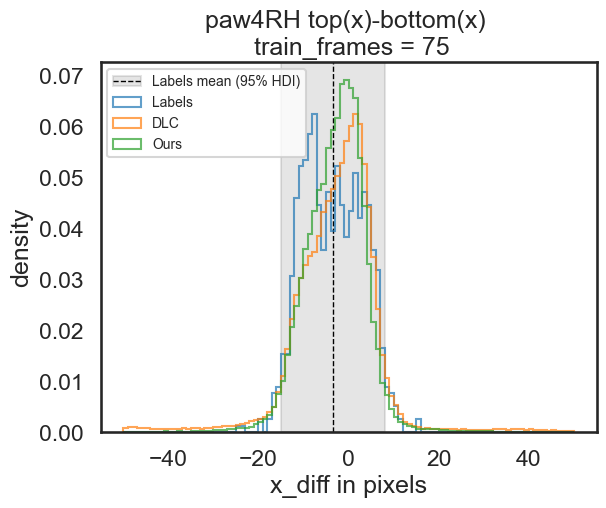

In [185]:
# plot a histogram for paw1LH x_diff for the labeled data
range_val = [-50, 50]
train_frames = "75"
histtype = "step"
alpha = 0.7
bins = 100
paw_name = "paw4RH"
bot_quantile, top_quantile = df_labels[f"{paw_name}_x_diff"].quantile(0.025), df_labels[f"{paw_name}_x_diff"].quantile(0.975)#df_labels.paw1LH_x_diff.quantile(0.975)
fig, ax = plt.subplots()
# plt.hist(df_labels["paw1LH_x_diff"], density= True, bins=50, range=[-range_val, range_val], alpha=0.3, label="labeled");
# plot the mean and std of the labeled data for comparison
mean = ax.axvline(np.nanmean(df_labels[f"{paw_name}_x_diff"]), color='k', linestyle='dashed', linewidth=1);
# plot a shaded region between the quantiles of the labeled data
hdi = ax.axvspan(bot_quantile, top_quantile, color='k', alpha=0.1);
# plot the histogram of the labels 
labels = ax.hist(df_labels[f"{paw_name}_x_diff"], histtype=histtype, density= True, bins=bins, range=range_val, alpha=alpha, label="labeled");
# plot the histogram for the supervised model
supervised = ax.hist(df_video_preds_concat[(df_video_preds_concat.model_type == "dlc")  & (df_video_preds_concat.train_frames == train_frames)][f"{paw_name}_x_diff"], histtype=histtype, density= True, bins=bins, range=range_val, alpha=alpha, label="dlc");
# plot the histogram for the semi-supervised context model
ss_context = ax.hist(df_video_preds_concat[(df_video_preds_concat.model_type == "semi-super context") & (df_video_preds_concat.train_frames == train_frames)][f"{paw_name}_x_diff"], histtype=histtype, density = True, bins=bins, range=range_val, alpha=alpha, label="context+ss");
# plot a legend with the mean and std of the labeled data as one entry
#create legend
# from matplotlib.patches import Rectangle
# hist_handle = Rectangle((0,0),1,1,color="cornflowerblue",ec=None, alpha=0.6)
ax.legend(handles = [(mean, hdi), labels[-1][0], supervised[-1][0], ss_context[-1][0]], labels = ["Labels mean (95% HDI)", "Labels", "DLC", "Ours"], fontsize=10, loc="upper left");

# ax.legend(handles = [(mean, hdi), hist_handle], labels = ["labels mean (95% HDI)", "DLC"], fontsize=12);
plt.title("%s top(x)-bottom(x) \n train_frames = %s" % (paw_name, train_frames));
plt.xlabel("x_diff in pixels");
plt.ylabel("density");

In [145]:
# count how many supervised frames violate 

/Users/danbiderman/miniconda3/envs/diagnostics/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/danbiderman/miniconda3/envs/diagnostics/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


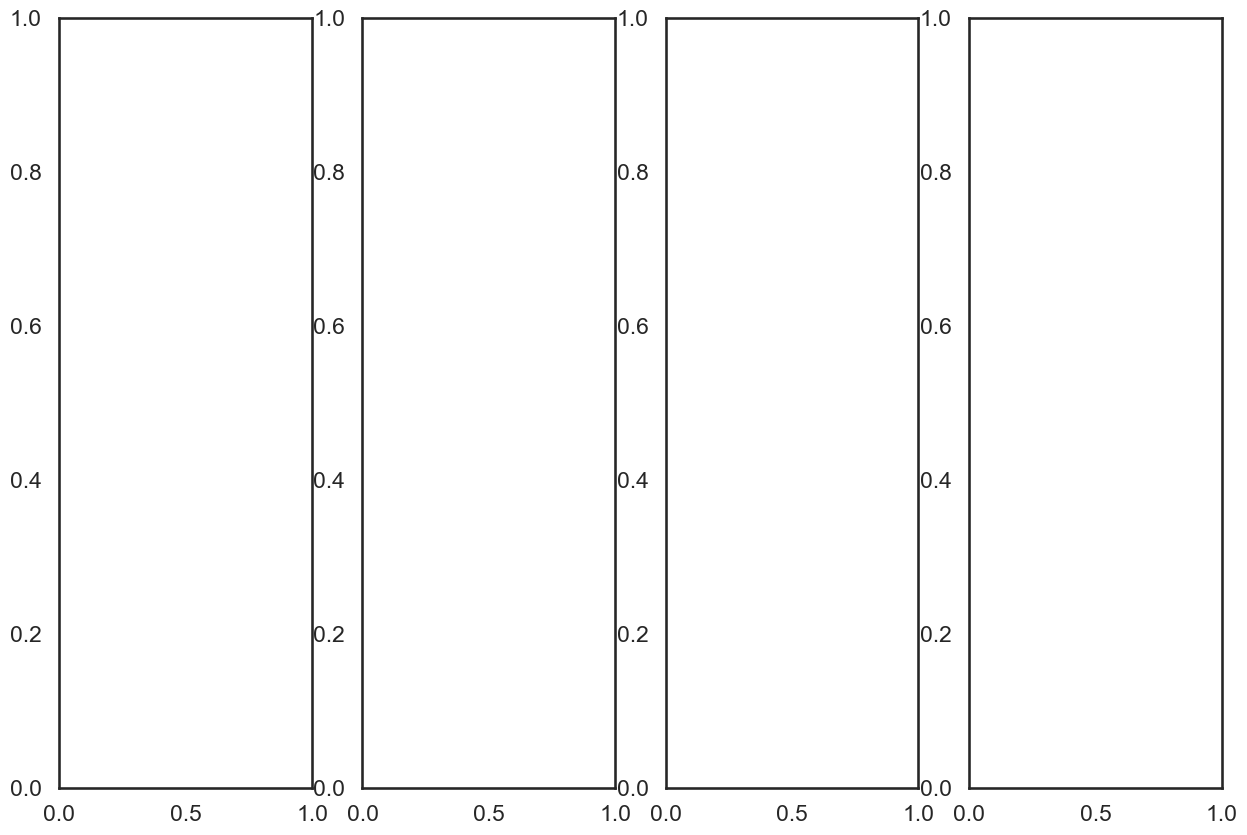

In [130]:
# now repeat the same plot, each bodypart in a separate panel
fig, axs = plt.subplots(1, len(paw_names), figsize=(15, 10))
for i, paw_name in enumerate(paw_names):
    # calculate mean and hdi on true labels
    mean = np.nanmean(np.log(df_labels[f"{paw_name}_x_diff"]))
    

In [45]:
# # plot a commulative step function in seaborn
# df_video_preds["paw1LH_x_diff_abs"] = df_video_preds["paw1LH_x_diff"].abs()
# sns.histplot(data=df_video_preds[df_video_preds["train_frames"] == "75"], x="paw1LH_x_diff_abs", hue="model_type", bins=50, element="step", fill=False, cumulative=True, multiple="layer", stat="density", common_norm=False, alpha=0.25);

In [31]:
np.nanmean(np.log(df_labels["paw1LH_x_diff"]))

/Users/danbiderman/miniconda3/envs/diagnostics/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf